In [3]:
import utilities as ut
import construction as cs
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


%load_ext autoreload
%autoreload 2


from IPython.core.display import HTML
HTML('<style>.container { width:97% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

# avg Node degree time all datasets

In [4]:
names = ["InVS13.dat","InVS15.dat", "LH10.dat",
         "High_School11.dat","High_School12.dat","High_School13.dat","primaryschool.dat"]
path_data = "../data/face-to-face/"
path_meta = "../data/face-to-face//metadata/metadata_"



NAME :  InVS13.dat
9827
DIPARTMENTS:  ['DISQ' 'DMCT' 'DSE' 'SFLE' 'SRH']


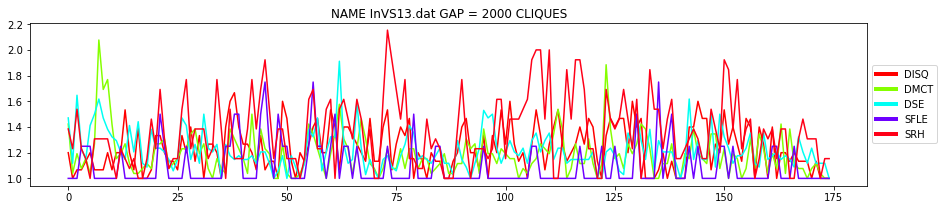

# of graphs 175
# of nodes 92


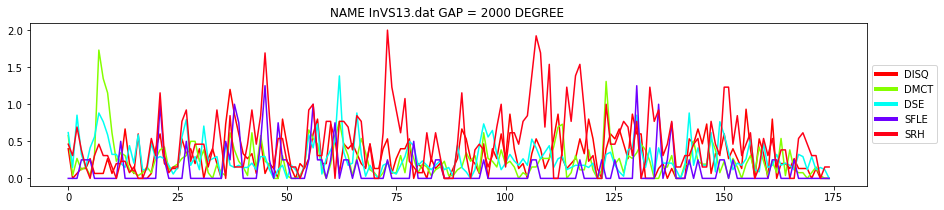







NAME :  InVS15.dat
78249
DIPARTMENTS:  ['DCAR' 'DG' 'DISQ' 'DMCT' 'DMI' 'DSE' 'DST' 'SCOM' 'SDOC' 'SFLE' 'SRH'
 'SSI']


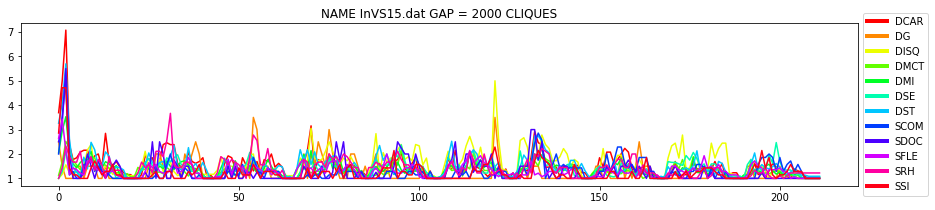

# of graphs 212
# of nodes 217


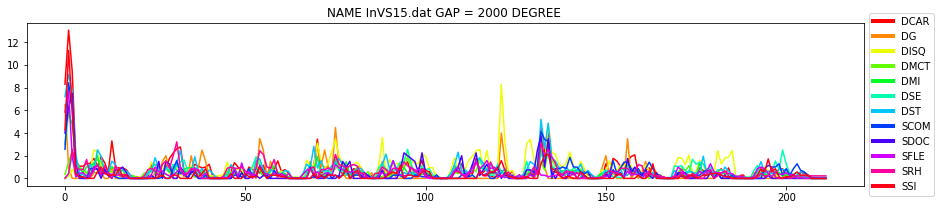







NAME :  LH10.dat
32424
DIPARTMENTS:  ['ADM' 'MED' 'NUR' 'PAT']


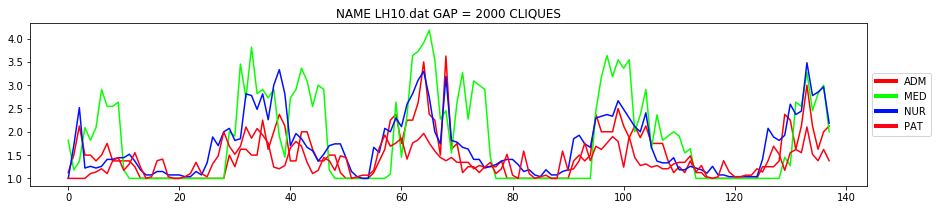

# of graphs 138
# of nodes 75


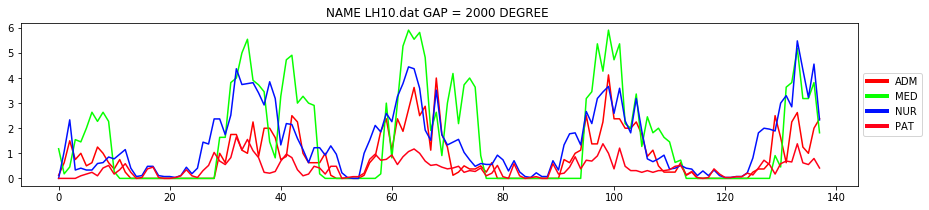







NAME :  High_School11.dat
28561
DIPARTMENTS:  ['PC' 'PC*' 'PSI*' 'teacher']


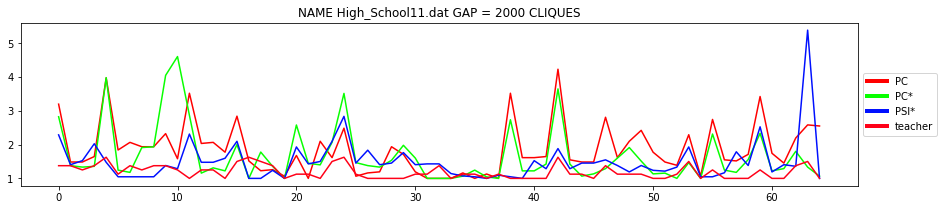

# of graphs 65
# of nodes 126


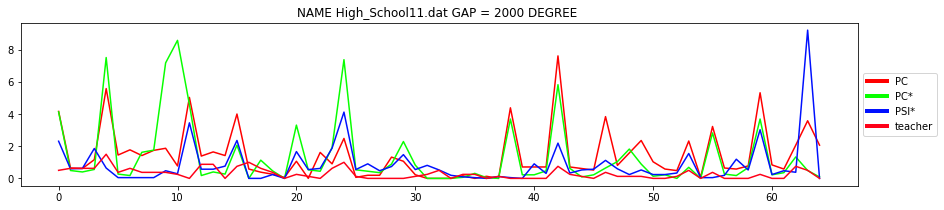







NAME :  High_School12.dat
45047
DIPARTMENTS:  ['MP*1' 'MP*2' 'PC' 'PC*' 'PSI*']


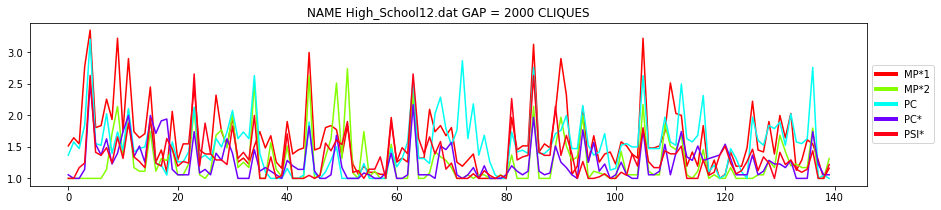

# of graphs 140
# of nodes 180


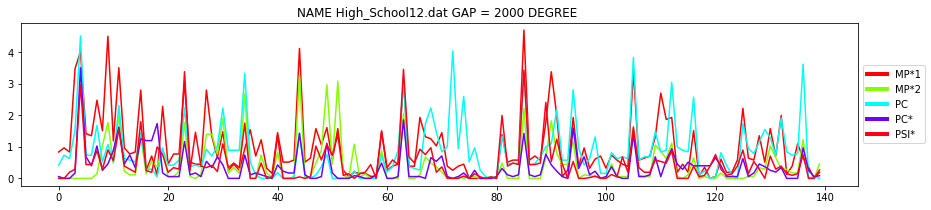







NAME :  High_School13.dat
188508
DIPARTMENTS:  ['2BIO' 'M' 'MP*' 'P' 'PC' 'PSI']


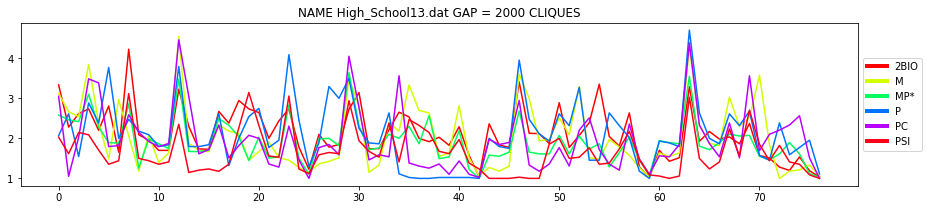

# of graphs 77
# of nodes 327


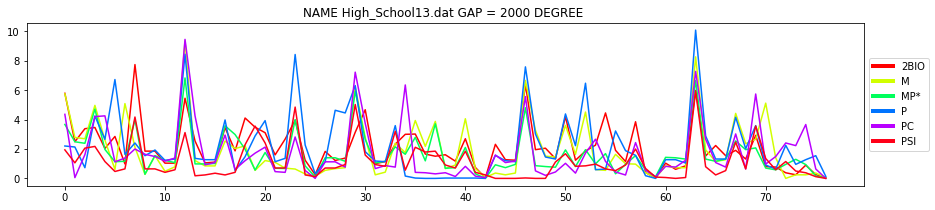







NAME :  primaryschool.dat
125773
DIPARTMENTS:  ['1A' '1B' '2A' '2B' '3A' '3B' '4A' '4B' '5A' '5B' 'Teachers']


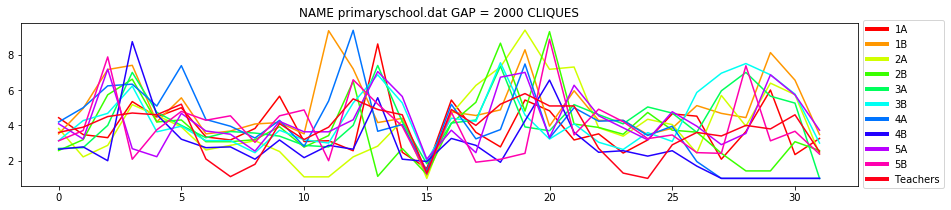

# of graphs 32
# of nodes 242


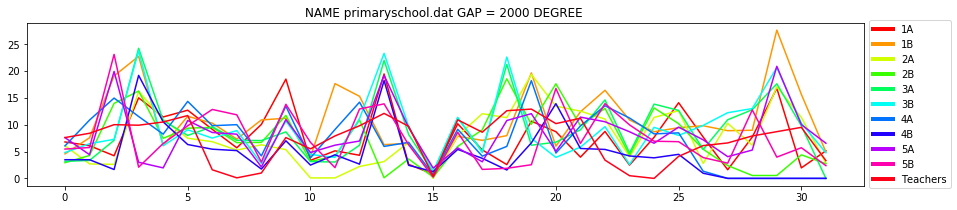

In [10]:
for name in names:
    print("NAME : ",name)
    data_in = cs.load_data(path_data+name)
    meta = path_meta+name
    print(len(data_in))

    # compute colors
    meta_dict = load_metadata(meta)
    dict_colors = compute_colors(meta_dict)
    data = data_in
    gap = 2000
    dict_cliques =  node_MAXclique_time(data,gap=gap)
    dict_avg_cliq = departments_average(dict_cliques,meta_dict)
    plot_node_behaviour_avg(dict_avg_cliq,
                        meta_dict = meta_dict,
                        dict_colors = dict_colors,
                        title = "NAME "+str(name)+" GAP = "+str(gap)+" CLIQUES",
                        figsize=(15,3),
                        alpha=0.5,
                        save=None)


    dict_degrees =  node_degrees_times(data,gap=gap)
    dict_avg_deg = departments_average(dict_degrees,meta_dict)
    plot_node_behaviour_avg(dict_avg_deg,
                        meta_dict = meta_dict,
                        dict_colors = dict_colors,
                        title = "NAME "+str(name)+" GAP = "+str(gap)+" DEGREE ",
                        figsize=(15,3),
                        alpha=0.5,
                        save=None)
    
    
    print("\n\n\n\n\n")

In [5]:
import math

def compute_numer_of_cliques(clique_size,size):
    
    a = math.factorial(clique_size)/(math.factorial(clique_size-size)*math.factorial(size))
    b = math.factorial(clique_size-1)/(math.factorial(clique_size-size-1)*math.factorial(size))
    return a-b

def number_cliques_given_size(data,gap,size):
    graphs, pos = cs.build_graphs(data,gap=gap)
    print("# of graphs",len(graphs))
    nodes = cs.individuals(data)

    cliqes_dict = dict()
    for n in nodes:
        cliqes_dict[n] = []

    for g in graphs:
        #nx.draw(g,with_labels=True)
        #plt.show()
        for n in g.nodes():
            cliques = nx.cliques_containing_node(g,n)
            number_of_cliques = 0

            for clique in cliques:
                if (len(clique)>size):
                    number_of_cliques = number_of_cliques + compute_numer_of_cliques(len(clique),size)
                elif (len(clique) == size):
                    number_of_cliques = number_of_cliques + 1

            cliqes_dict[n].append(int(number_of_cliques))

    return(cliqes_dict)

def node_MAXclique_time(data,gap):
    graphs, pos = cs.build_graphs(data,gap=gap)
    nodes = cs.individuals(data)
    cliqes_dict = dict()
    for n in nodes:
        cliqes_dict[n] = []

    for g in graphs:
        for n in g.nodes():
            cliques = nx.cliques_containing_node(g,n)
            maximum = 0
            for clique in cliques:
                if len(clique)>maximum:
                    maximum = len(clique)
            cliqes_dict[n].append(maximum)
    return(cliqes_dict)   
    
def plot_node_behaviour_avg(dictionary,meta_dict,dict_colors,title=None,figsize=(15,3),alpha=0.5,save=None):
    keys = list(dictionary.keys())
    plt.figure(figsize=(15,3))
    for i in keys:
        degrees = dictionary[i]
        plt.plot((degrees),alpha=1,color = dict_colors[i])

    # build legend
    custom_legend = []
    custom_departmenst = []
    for i in np.unique(list(meta_dict.values())):
        custom_departmenst.append(i)
        custom_legend.append(Line2D([0], [0], color=dict_colors[i], lw=4))

    plt.legend(custom_legend, np.unique(list(meta_dict.values())),loc='center left', bbox_to_anchor=(1, 0.5))
    if (title):
        plt.title(title)
    if (save):
        name = str(save)+".pdf"
        plt.savefig(name)
    plt.show()

#### compute the average of a dictionary 
def departments_average(dictionary,meta_dict):
    departments = np.unique(list(meta_dict.values()))

    # initialize average clique dictionary
    dict_avg = dict()
    for i in departments:
        dict_avg[i] = []

    # crate dict avg
    # dict_avg {Dipartmend : [[(Node1) t1,t2,t3..][(Node1) t1,t2,t3..]...]...}
    for i in dictionary: 
        dict_avg[meta_dict[i]].append(dictionary[i])
        
    # comute the average
    for i in departments:
        tmp = dict_avg[i]
        dict_avg[i] = np.mean(tmp,0)
    
    return(dict_avg)

In [6]:
from matplotlib.lines import Line2D



def plot_node_behaviour_unique_department(dictionary,meta_dict,dict_colors,figsize=(15,3),alpha=0.5,save=None):
    departmens = np.unique(list(meta_dict.values()))
    
    plt.figure(figsize=(15,3*len(departmens)))
    j = 1
    for dip in departmens:
        plt.subplot(len(departmens),1,j)
        j = j + 1
        keys = list(dictionary.keys())
        
        for i in keys:
            degrees = dictionary[i]
            if (meta_dict[i]==dip):
                plt.plot((degrees))
        plt.title("Department: "+dip)
        
    
    plt.subplots_adjust(hspace=0.3)
    if (save):
        name = "results/"+save+"_"+dip+".pdf"
        plt.savefig(name)
    plt.show()

def plot_node_behaviour(dictionary,meta_dict,dict_colors,figsize=(15,3),title=None,alpha=0.5,save=None):
    keys = list(dictionary.keys())
    plt.figure(figsize=figsize)
    for i in keys:
        degrees = dictionary[i]
        plt.plot((degrees),alpha=alpha,color = dict_colors[meta_dict[i]])

    # build legend
    custom_legend = []
    custom_departmenst = []
    for i in np.unique(list(meta_dict.values())):
        custom_departmenst.append(i)
        custom_legend.append(Line2D([0], [0], color=dict_colors[i], lw=4))

    plt.legend(custom_legend, np.unique(list(meta_dict.values())),loc='center left', bbox_to_anchor=(1, 0.5))
    if (save):
        name = str(save)+".pdf"
        plt.savefig(name)
    if (title):
        plt.title(title)
    plt.show()

    
    
 

In [7]:
def node_degrees_times(data,gap):
    '''
    Input: loaded file, and GAP
    Output: dict_degree a dictionary {node_id : [degree t0,degree t1, degree_t2 ..]....}
    '''

    graphs, pos = cs.build_graphs(data,gap)
    print("# of graphs",len(graphs))

    nodes = cs.individuals(data)
    print("# of nodes",len(nodes))
    dict_degrees = dict() # inizialize dictionary {node_id : []}
    for n in nodes:
        dict_degrees[n] = []

    # fill dictionary
    for g in graphs:
        for n in g.nodes():
            degree = nx.degree(g,n)
            dict_degrees[n].append(degree)
        
    return(dict_degrees)

In [8]:
def load_metadata(path):
    '''
    Input METADATA PATH
    Output dictionary {node_ID : "Dipartment",...}
    '''
    fp = open(path, 'r')
    meta_dict = dict()
    for line in fp.readlines():
        meta_dict[int(line.split("\t")[0])] = line.split("\t")[1][0:-1]

    fp.close()  
    print("DIPARTMENTS: ",np.unique(list(meta_dict.values())))
    return(meta_dict)

def compute_colors(meta_dict):
    '''
    Input metadata dictionary {node_ID : "Dipartment",...}
    Output colors dictionary {"Dipartment": "color"}
    '''
    departments = np.unique(list(meta_dict.values()))
    colors = get_cmap(len(departments))
    dict_colors = dict()
    for i in range(len(departments)):
        dict_colors[departments[i]] = colors(i)
        
        
    return(dict_colors)


def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)
